#### PREPARING THE DATASET TO APPLY ML MODELS TO IT

##### PREPARING ENCONDING METHODS

In [112]:
lab_enc_teams = LabelEncoder()
lab_enc_results = LabelEncoder()
hot_enc_teams = OneHotEncoder()
teams_encoded = lab_enc_teams.fit_transform(historical_acc.Team.unique())
results_encoded = lab_enc_results.fit_transform(['H','D','A'])

In [113]:
final_dataset['HomeCode'] = lab_enc_teams.fit_transform(final_dataset[["HomeTeam"]].values.reshape(-1,))
final_dataset['AwayCode'] = lab_enc_teams.fit_transform(final_dataset[["AwayTeam"]].values.reshape(-1,))
final_dataset['result_code'] = lab_enc_results.fit_transform(final_dataset[['result']].values.reshape(-1,))

##### CHANGING SOME VARIABLES TYPES

In [114]:
# Fitting some format variables

categories = ['Div','season','HomeTeam','AwayTeam','result']

floats = ['B365H','B365D','B365A']

integers = ['season']


# Categories 

for item in categories:
    final_dataset[item] = final_dataset[item].astype('category')
    
# floats

for item in floats:
    final_dataset[item] = final_dataset[item].astype('float')
    
# integers

for item in integers:
    final_dataset[item] = final_dataset[item].astype('int64')

##### SPLITTING DATASET

In [115]:
scaler = StandardScaler()

features = final_dataset.select_dtypes('integer').iloc[:,:-1]
                                
target = final_dataset['result_code']

#Training regular dataset 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state = 13)

#Normalized X_train and X_test datasetsdar

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.iloc[:,:-2]), columns = X_train.columns[:-2]) # I exclude Home and Away Team before  applying Standard Scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test.iloc[:,:-2]), columns = X_test.columns[:-2])
features_scaled = pd.DataFrame(scaler.transform(features.iloc[:,:-2]), columns = features.columns[:-2])

##### KMEANS - ARE THERE SIMILAR MATCHES ? 

I will work on identying similar kind of matches by KMeans to check later if accuracy is better for one or some of these clusters.

In [116]:
 kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
    
sse = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

In [117]:
# A list holds the silhouette coefficients for each 

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

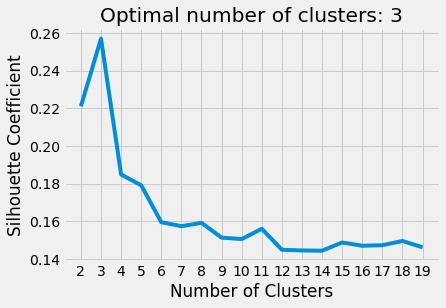

In [118]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Optimal number of clusters: '+ str(silhouette_coefficients.index(max(silhouette_coefficients))+2))
plt.show()